<a href="https://colab.research.google.com/github/ammarrrw/ModelBatik/blob/main/Model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
len(os.listdir('/content/drive/MyDrive/DATASET 19 JENIS'))

2

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-02 15:14:30--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  24.8MB/s    in 3.7s    

2023-06-02 15:14:34 (22.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [5]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [6]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (19, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [7]:
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


TRAINING_DIR = "/content/drive/MyDrive/DATASET 19 JENIS/TRAIN"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/DATASET 19 JENIS/TEST"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=19
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=19
)

Found 1330 images belonging to 19 classes.
Found 190 images belonging to 19 classes.


In [10]:
history = model.fit(
    train_generator, 
    epochs=25, 
    steps_per_epoch=1330//19, 
    validation_data = validation_generator, 
    verbose = 1, 
    validation_steps=190//19)

Epoch 1/25
70/70 [==============================] - 825s 12s/step - loss: 2.4299 - accuracy: 0.2722 - val_loss: 1.8221 - val_accuracy: 0.4526
Epoch 2/25
70/70 [==============================] - 70s 988ms/step - loss: 1.6942 - accuracy: 0.4774 - val_loss: 1.4373 - val_accuracy: 0.5316
Epoch 3/25
70/70 [==============================] - 69s 985ms/step - loss: 1.4382 - accuracy: 0.5504 - val_loss: 1.3659 - val_accuracy: 0.5684
Epoch 4/25
70/70 [==============================] - 70s 1s/step - loss: 1.2343 - accuracy: 0.6000 - val_loss: 1.1490 - val_accuracy: 0.6316
Epoch 5/25
70/70 [==============================] - 67s 958ms/step - loss: 1.0863 - accuracy: 0.6519 - val_loss: 1.1304 - val_accuracy: 0.6263
Epoch 6/25
70/70 [==============================] - 73s 1s/step - loss: 1.0433 - accuracy: 0.6662 - val_loss: 1.0455 - val_accuracy: 0.6421
Epoch 7/25
70/70 [==============================] - 72s 1s/step - loss: 0.9479 - accuracy: 0.6977 - val_loss: 1.1581 - val_accuracy: 0.6368
Epoch 8/2

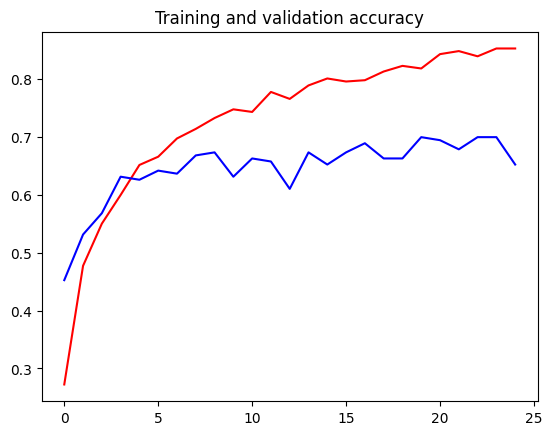

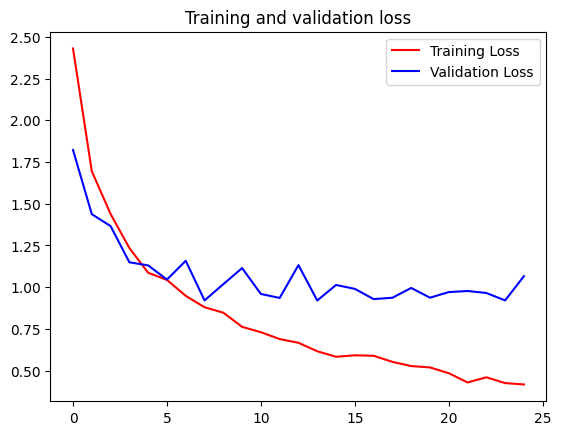

In [11]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
def get_class_string_from_index(index):
   for class_string, class_index in val_images.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(val_images)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show() 

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

NameError: ignored

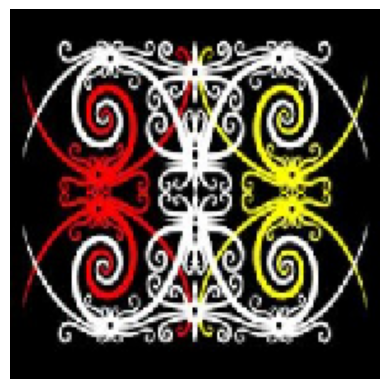

1/1 [==============================] - 1s 1s/step
True label: Batik Kalimantan Tengah
Predicted label: Batik Kalimantan Tengah


In [14]:
import numpy as np
def get_class_string_from_index(index):
   for class_string, class_index in validation_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(validation_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show() 

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

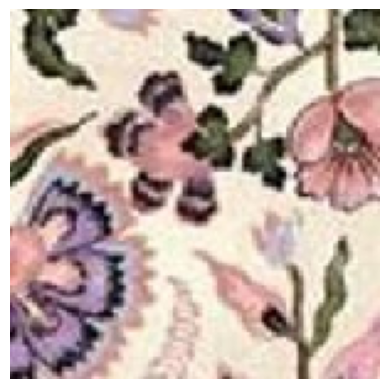

1/1 [==============================] - 0s 94ms/step
True label: Batik Bali
Predicted label: Batik Bali


In [15]:
import numpy as np
def get_class_string_from_index(index):
   for class_string, class_index in validation_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(validation_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show() 

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

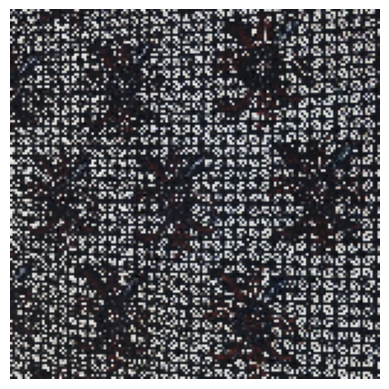

1/1 [==============================] - 0s 151ms/step
True label: Batik Pati
Predicted label: Batik Pati


In [16]:
import numpy as np
def get_class_string_from_index(index):
   for class_string, class_index in validation_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(validation_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show() 

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

In [18]:
motives_dict = train_generator.class_indices
print(motives_dict)

{'Batik Aceh': 0, 'Batik Bali': 1, 'Batik Betawi': 2, 'Batik Cirebon': 3, 'Batik Corak Insang': 4, 'Batik Geblek Renteng': 5, 'Batik Ikat Celup': 6, 'Batik Kalimantan Tengah': 7, 'Batik Kawung': 8, 'Batik Lasem': 9, 'Batik Madura': 10, 'Batik Papua': 11, 'Batik Parang': 12, 'Batik Pati': 13, 'Batik Poleng': 14, 'Batik Pontianak': 15, 'Batik Sekar Jagad': 16, 'Batik Tambal': 17, 'Batik Truntum': 18}


In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
test_dir = "/content/drive/MyDrive/DATASET 19 JENIS/TEST/"

for motive in motives_dict.keys():
    images_list = os.listdir(os.path.join(test_dir, motive))    
#     plt.figure(figsize=(16, 20))

    correct_count = 0

    for idx, image in enumerate(images_list):
        img_path = f'/content/drive/MyDrive/DATASET 19 JENIS/TEST/{motive}/{image}'
        img = load_img(img_path, target_size=(150, 150))

        img_array = img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        motives_list = list(motives_dict.keys())
        prediction = model(img_array)
        pred_idx = np.argmax(prediction)
        pred_motive = motives_list[pred_idx]
        pred_confidence = prediction[0][pred_idx] * 100

        if pred_motive == motive:
            correct_count += 1

#         plt.subplot(5, 4, idx+1)
#         plt.title(f'Actual: {motive}\nPrediction: {pred_motive} {pred_confidence:.2f}%')
#         plt.imshow(img)
#         plt.axis('off')
    
    print(f'{motive} Predictions --> {correct_count}/10 correct')

Batik Aceh Predictions --> 0/10 correct
Batik Bali Predictions --> 0/10 correct
Batik Betawi Predictions --> 0/10 correct
Batik Cirebon Predictions --> 0/10 correct
Batik Corak Insang Predictions --> 0/10 correct
Batik Geblek Renteng Predictions --> 0/10 correct
Batik Ikat Celup Predictions --> 3/10 correct
Batik Kalimantan Tengah Predictions --> 0/10 correct
Batik Kawung Predictions --> 0/10 correct
Batik Lasem Predictions --> 0/10 correct
Batik Madura Predictions --> 0/10 correct
Batik Papua Predictions --> 0/10 correct
Batik Parang Predictions --> 0/10 correct
Batik Pati Predictions --> 0/10 correct
Batik Poleng Predictions --> 7/10 correct
Batik Pontianak Predictions --> 3/10 correct
Batik Sekar Jagad Predictions --> 0/10 correct
Batik Tambal Predictions --> 0/10 correct
Batik Truntum Predictions --> 0/10 correct


In [ ]:
#Determining y_true for confusion matrix
num_ex = len(valid_generator.filenames)
num_of_generator_calls = math.ceil(num_ex / (1.0 * BATCH_SIZE))

test_labels = []

for i in range(0, int(num_of_generator_calls)):
    test_labels.extend(np.array(valid_generator[i][1]))

y_true = []
for i in range(0, num_ex):
  a = 0
  for j in range(19):
    if test_labels[i][j] == 0:
      a += 1
      continue
    else:
      break
  y_true.append(a)

In [ ]:
#Determining y_pred for confusion matrix
predict = model.predict(valid_generator,num_ex)
pred = np.argmax(predict, axis=1)
y_pred = []

for i in range(len(pred)):
    y_pred.append(pred[i])

In [ ]:
#confusion matrix
conf =  confusion_matrix(valid_generator.classes, y_pred)
# norm_conf = conf/conf.astype(np.float).sum(axis=1)

In [ ]:
1=0
2=0
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
red=0
bl=0
for i in range(19):
  for j in range(19):
    if i == 0:
      al += conf[i][j]
    elif i == 1:
      cl += conf[i][j]
    elif i == 2:
      red += conf[i][j]
    elif i == 3:
      bl += conf[i][j]

In [ ]:
# initialize
conf_percent=np.zeros((4,4), np.float32)

for i in range(4):
  for j in range(4):
    if i == 0:
      conf_percent[i][j] = conf[i][j]/al
    elif i == 1:
      conf_percent[i][j] = conf[i][j]/cl
    elif i == 2:
      conf_percent[i][j] = conf[i][j]/red
    elif i == 3:
      conf_percent[i][j] = conf[i][j]/bl

In [ ]:
classes = os.listdir(BASE_DATASET_PATH)
# classes = ['Alluvial', 'Clay', 'Latosol', 'Humus']
# plot confusion matrix
plt.imshow(conf_percent, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = '0.3f'
thresh = conf_percent.max() / 2.
for i, j in itertools.product(range(conf_percent.shape[0]), range(conf_percent.shape[1])):
    plt.text(j, i, format(conf_percent[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_percent[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('plot_confusion_matrix.png')